In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from matplotlib.pyplot import Line2D
import plotly.express as px

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Front.xlsx to Front.xlsx


In [6]:
df = pd.read_excel('Front.xlsx')
del df['S.No.']

In [7]:
df.head()

,Student,Attempt Submission Time,Grades,Exam duration (Sec)
0,MUHAMMED FAIES,"Dec. 29, 2021, 11:16 a.m.",93.33,390
1,Sai Akshay,"Dec. 29, 2021, 9:09 a.m.",80.00,726
2,MUHAMMED NA,"Dec. 29, 2021, 4:55 a.m.",80.00,666
3,VINAYAK K,"Dec. 29, 2021, 4:03 a.m.",46.67,478
4,ANJALI ARORA,"Dec. 28, 2021, 5:09 p.m.",80.00,946


##### basic plots for the two continuous variables

###### looking at both the continuous variables seperately, univariate distributions (histplot, densityplot, distplot, boxplots, violinplots)

<Axes: xlabel='Exam duration (Sec)', ylabel='Count'>

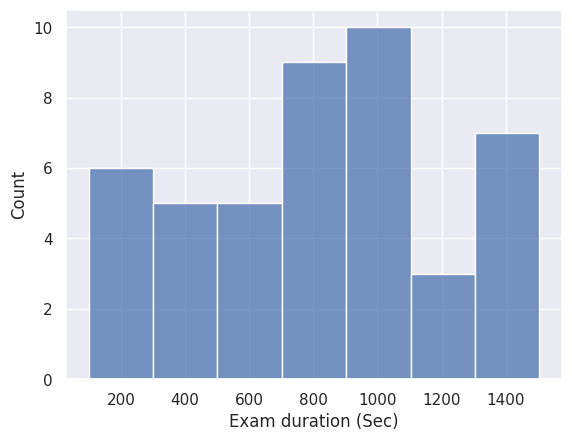

In [9]:
#sns.histplot(data=df, x="Grades")
sns.set_theme()
sns.histplot(data=df, x="Exam duration (Sec)")

<Axes: ylabel='Density'>

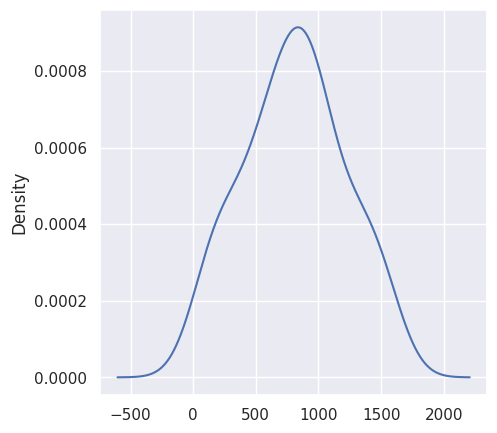

In [10]:
#sns.set(rc={'figure.figsize':(5,5)})
#sns.kdeplot(df['Grades'], shade=True) # density plot
plt.figure(figsize=(5,5))
df['Exam duration (Sec)'].plot(kind='density')

<ipython-input-11-1b6842370d9c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Grades'], color='black', rug=True) #hist and density/kde plot together


<Axes: xlabel='Grades', ylabel='Density'>

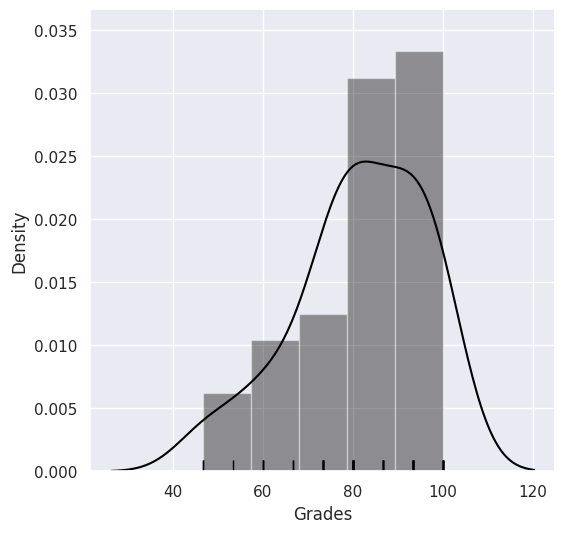

In [11]:
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(df['Grades'], color='black', rug=True) #hist and density/kde plot together
#sns.set(rc={'figure.figsize':(6,6)})
#sns.distplot(df['Exam duration (Sec)'], color='black', rug=True)

In [12]:
fig = px.histogram(df, x="Grades", marginal="box", # can be `box`, `violin`
                         hover_data=df.columns, width=800,height = 500)
#fig = px.histogram(df, x="Exam duration (Sec)", marginal="box", # can be `box`, `violin`
                         #hover_data=df.columns, width=800,height = 500)
fig.update_layout(bargap=0.05)
fig.show()

###### looking at the variables together

<ipython-input-14-bf278d5b6f9a>:2: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



<Axes: xlabel='Grades', ylabel='Exam duration (Sec)'>

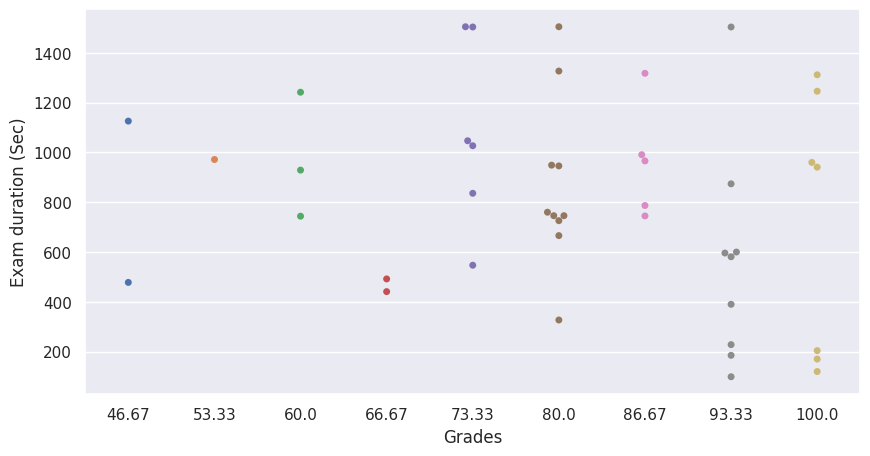

In [14]:
plt.figure(figsize=(10,5))
sns.swarmplot(x=df["Grades"], y=df["Exam duration (Sec)"], palette="deep") #better way of looking at the scatterplot

In [15]:
plt.figure(figsize=(10,5))
px.scatter(df, x="Grades", y="Exam duration (Sec)", opacity=0.75,
    trendline='ols', trendline_color_override='darkblue', width=800, height=400)

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='Grades', ylabel='Exam duration (Sec)'>

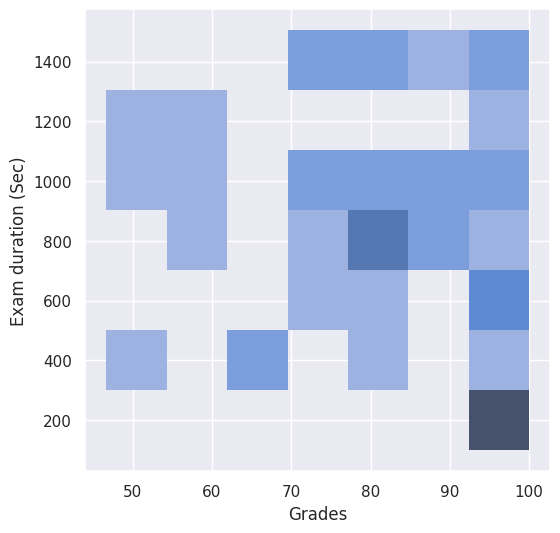

In [16]:
plt.figure(figsize=(6,6))
sns.histplot(df, x="Grades", y="Exam duration (Sec)") # When both x and y are assigned, a bivariate histogram is computed and shown as a heatmap

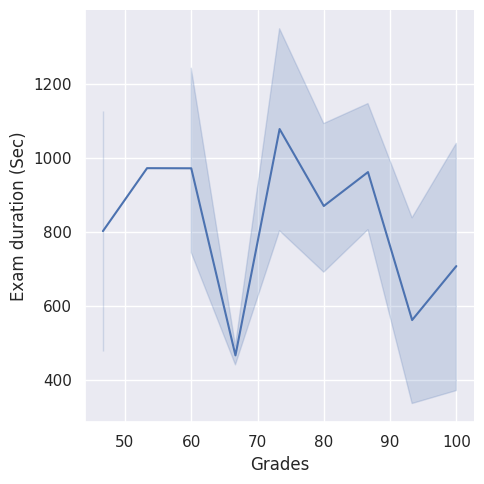

In [17]:
## continuity with line plots
sns.relplot(x="Grades", y="Exam duration (Sec)", data=df, kind='line')

## the light blue visuals are the confidence intervals which tell the possible range around the estimate. It also tells you about how stable the estimate is.
## so if we take an entirely new grade score like 85, the interval gives us the range around which the duration should be according to the data that we have.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




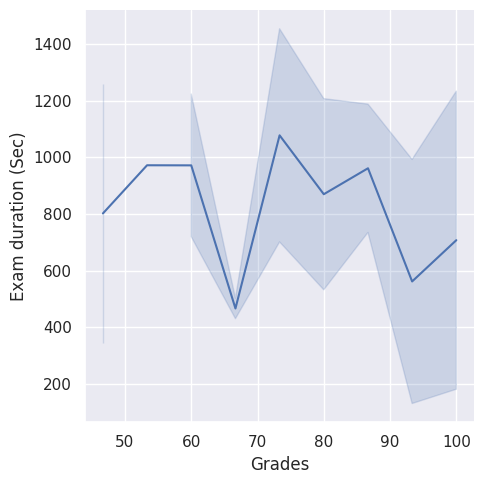

In [18]:
sns.relplot(x="Grades", y="Exam duration (Sec)", kind="line", ci="sd", data=df)

## in this the light blue visual show the std deviation which tells us how dispersed the data is.

In [ ]:
# some more variables, especially categorical like gender etc would provide us with better viz.

##### k means (k=4 and viz)

In [19]:
#creating a new df
data = [df['Grades'], df['Exam duration (Sec)']]
headers = ['Grades','Exam duration(secs)']

new_df = pd.concat(data, axis=1, keys=headers)

In [20]:
new_df.head()

,Grades,Exam duration(secs)
0,93.33,390
1,80.00,726
2,80.00,666
3,46.67,478
4,80.00,946


In [21]:
# scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_scaled = scaler.fit_transform(new_df)

# converting the numpy array into a pandas DataFrame
df_scaled = pd.DataFrame(df_scaled,columns=['Grades','Exam duration (Sec)'])

In [22]:
## running the kmeans clustering model by taking k as 4 using elbow, silhouette and other methods
km = KMeans(n_clusters = 4)
y_predicted = km.fit_predict(df_scaled[['Grades','Exam duration (Sec)']])
y_predicted
df_scaled['cluster_k_four'] = y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



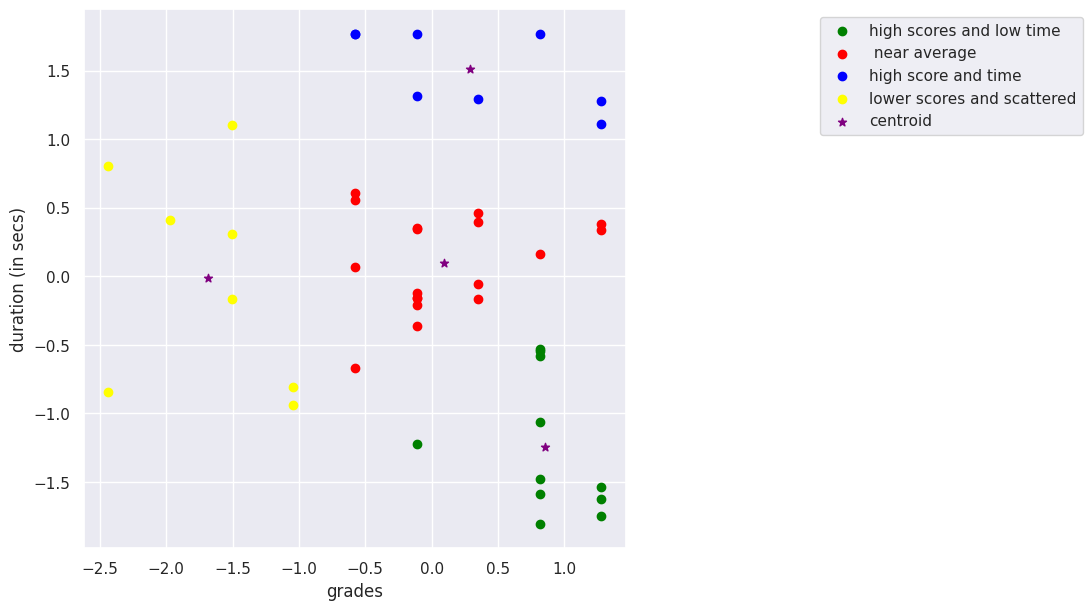

In [24]:
df1 = df_scaled[df_scaled.cluster_k_four==0]
df2 = df_scaled[df_scaled.cluster_k_four==1]
df3 = df_scaled[df_scaled.cluster_k_four==2]
df4 = df_scaled[df_scaled.cluster_k_four==3]

plt.figure(figsize=(7,7))

plt.scatter(df1['Grades'],df1['Exam duration (Sec)'],color='green',label='high scores and low time')
plt.scatter(df2['Grades'],df2['Exam duration (Sec)'],color='red',label=' near average')
plt.scatter(df3['Grades'],df3['Exam duration (Sec)'],color='blue',label='high score and time')
plt.scatter(df4['Grades'],df4['Exam duration (Sec)'],color='yellow',label='lower scores and scattered')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

#plt.axhline(y = -1.098894e-16, color = 'k', linestyle = 'dashed') # the average response time in secs
#plt.axvline(x = 5.029990e-16, color = 'k', linestyle = 'dashed') # the average grade
plt.xlabel('grades')
plt.ylabel('duration (in secs)')
plt.legend()
plt.legend(loc="upper center", bbox_to_anchor=(1.6,1), ncol=1)

##### other k means viz

In [25]:
# get centroids
centroids = km.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

In [26]:
df_scaled['cen_x'] = df_scaled.cluster_k_four.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df_scaled['cen_y'] = df_scaled.cluster_k_four.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF', '#d9df20']
df_scaled['c'] = df_scaled.cluster_k_four.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})

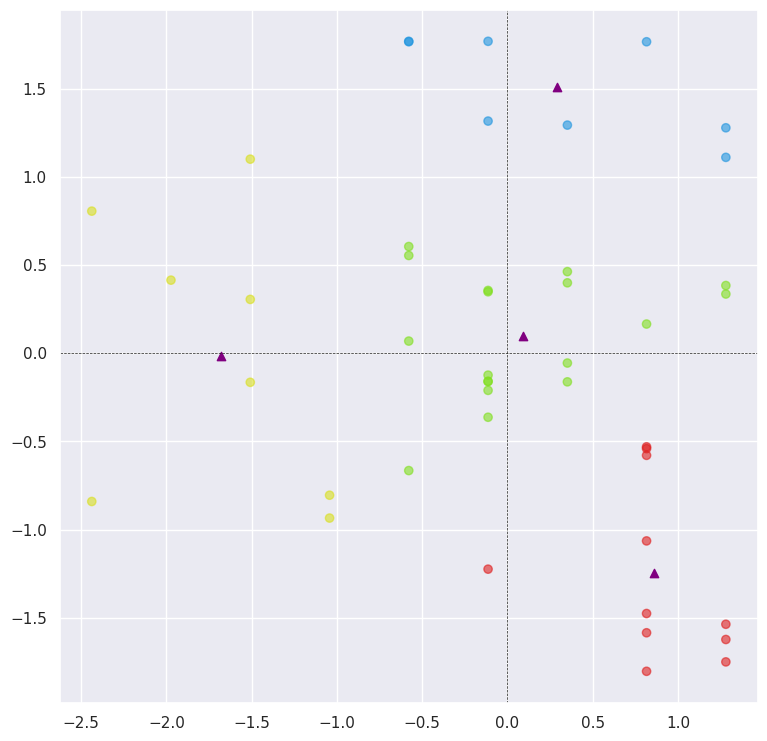

In [27]:
plt.figure(figsize=(9,9))
plt.scatter(df_scaled['Grades'], df_scaled['Exam duration (Sec)'], c=df_scaled.c, alpha = 0.6)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='^',label='centroid')
plt.axhline(y = -1.098894e-16, color = 'k', linestyle = 'dashed', lw=0.5) # the average response time in secs
plt.axvline(x = 5.029990e-16, color = 'k', linestyle = 'dashed', lw=0.5) # the average grade

the lines are the respectable variable averages

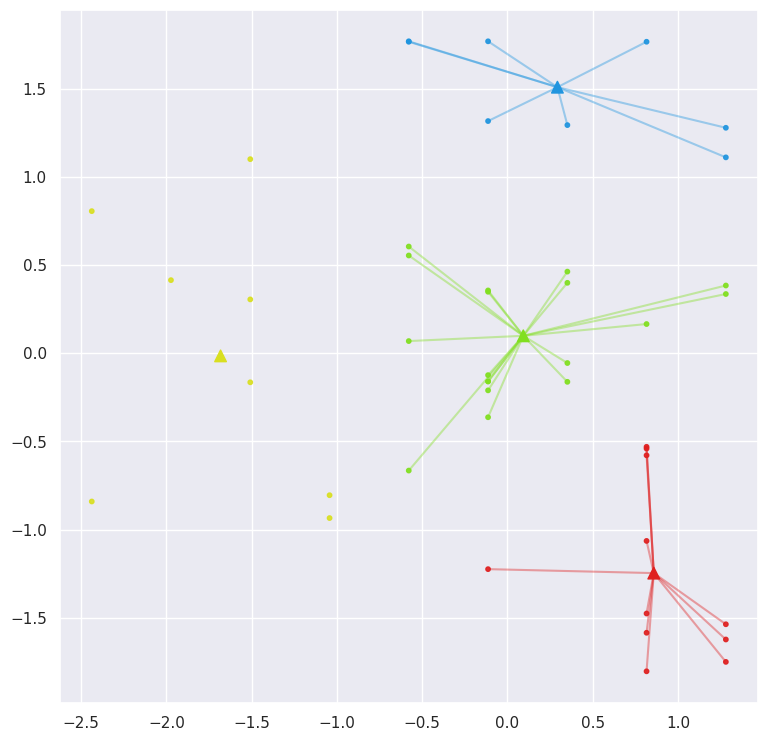

In [28]:
fig, ax = plt.subplots(1, figsize=(9,9))
# plot data
plt.scatter(df_scaled['Grades'], df_scaled['Exam duration (Sec)'], c=df_scaled.c, alpha = 0.9, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot lines
for idx, val in df_scaled.iterrows():
    x = [val.Grades, val.cen_x,]
    y = [val['Exam duration (Sec)'], val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.4)# legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1),
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1),
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])

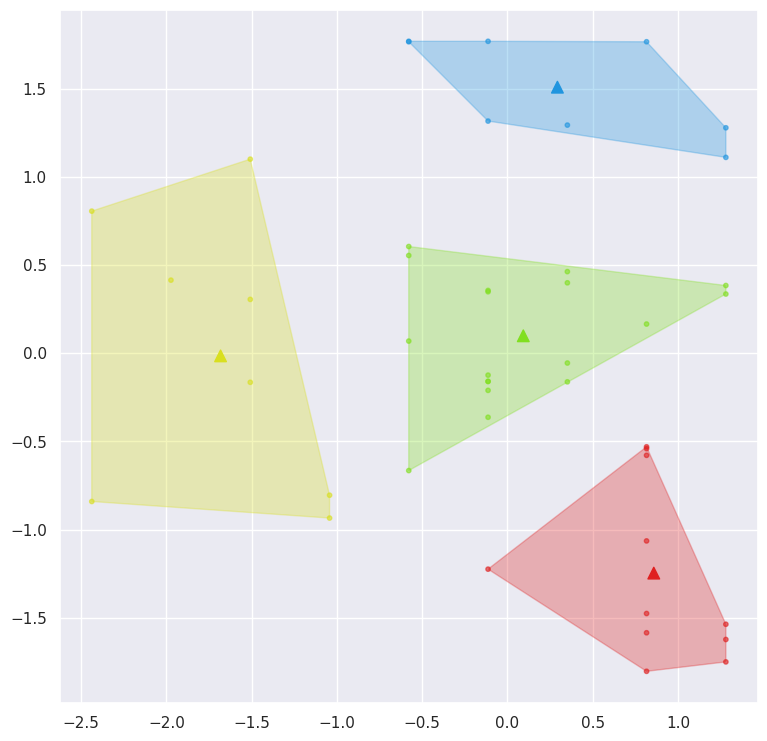

In [29]:
fig, ax = plt.subplots(1, figsize=(9,9))
# plot data
plt.scatter(df_scaled['Grades'], df_scaled['Exam duration (Sec)'], c=df_scaled.c, alpha = 0.6, s=10)
# plot centers
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)# draw enclosure
for i in df_scaled.cluster_k_four.unique():
    points = df_scaled[df_scaled.cluster_k_four == i][['Grades', 'Exam duration (Sec)']].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])

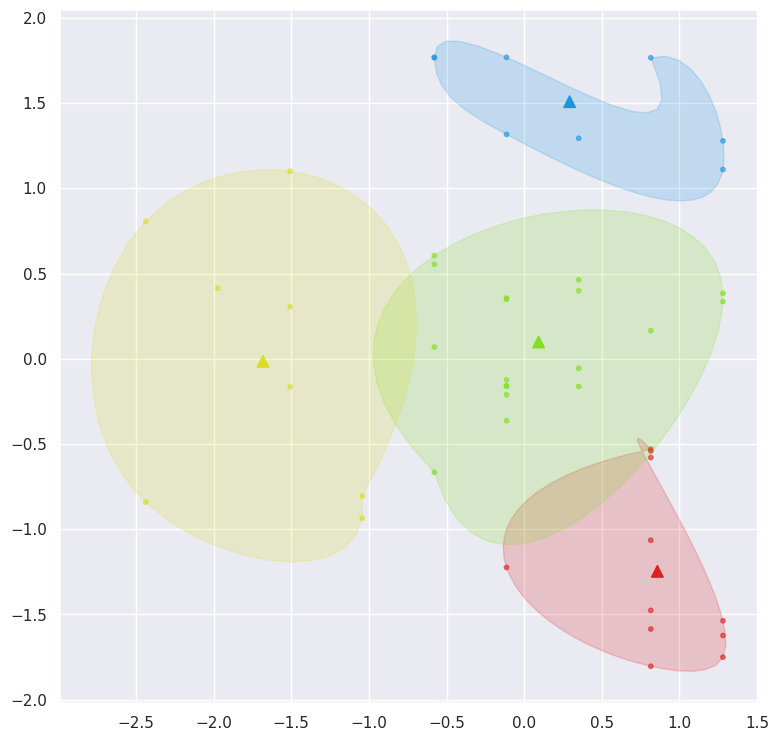

In [30]:
import scipy.interpolate
fig, ax = plt.subplots(1, figsize=(9,9))
plt.scatter(df_scaled['Grades'], df_scaled['Exam duration (Sec)'], c=df_scaled.c, alpha = 0.6, s=10)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)

for i in df_scaled.cluster_k_four.unique():
    # get the convex hull
    points = df_scaled[df_scaled.cluster_k_four == i][['Grades', 'Exam duration (Sec)']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])

    # interpolate
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = scipy.interpolate.splprep([x_hull, y_hull],
                                    u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = scipy.interpolate.splev(interp_d, spline)

    # plot shape
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)